In [16]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Credit card fraud detection with LightGBM

This notebook contains a project in which python was used to create a predictive model 
that can accurately classify credit card transactions as fraudulent or non fraudulent. The data employed was obtained 
from the "Credit Card Fraud Detection" dataset from Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data.

It contains only numerical input variables that were obtained through PCA transformatios. Unfortunately,the original features and more background information about the data were not provded due to confidentiality reasons. Features V1 through V28 are the principal components obtained with PCA, the only features that were not transformed with PCA are 'Time' and 'Amount'.

In [17]:
#Importing the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data exploration

In this section, we will explore the data to understand it more. However, because we don't have all the information regarding what the features in the dataset mean, it makes the dataset hard to analyze beyond typical statistical values and plots.

In [18]:
#All columns are numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
#there are no null values in the dataset
df.isnull().sum().sum()

0

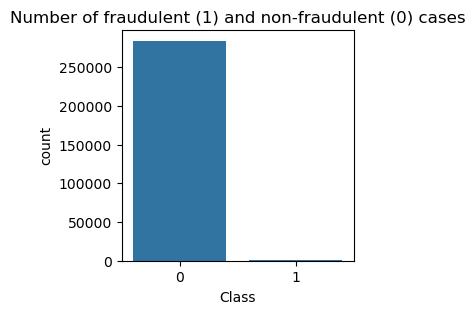

In [20]:
#Determining class balance
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='Class')
plt.title('Number of fraudulent (1) and non-fraudulent (0) cases');

In [21]:
#number of frauds in the dataset
df['Class'].sum()

492

In [22]:
#Observing some of the most important statistical values from our dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


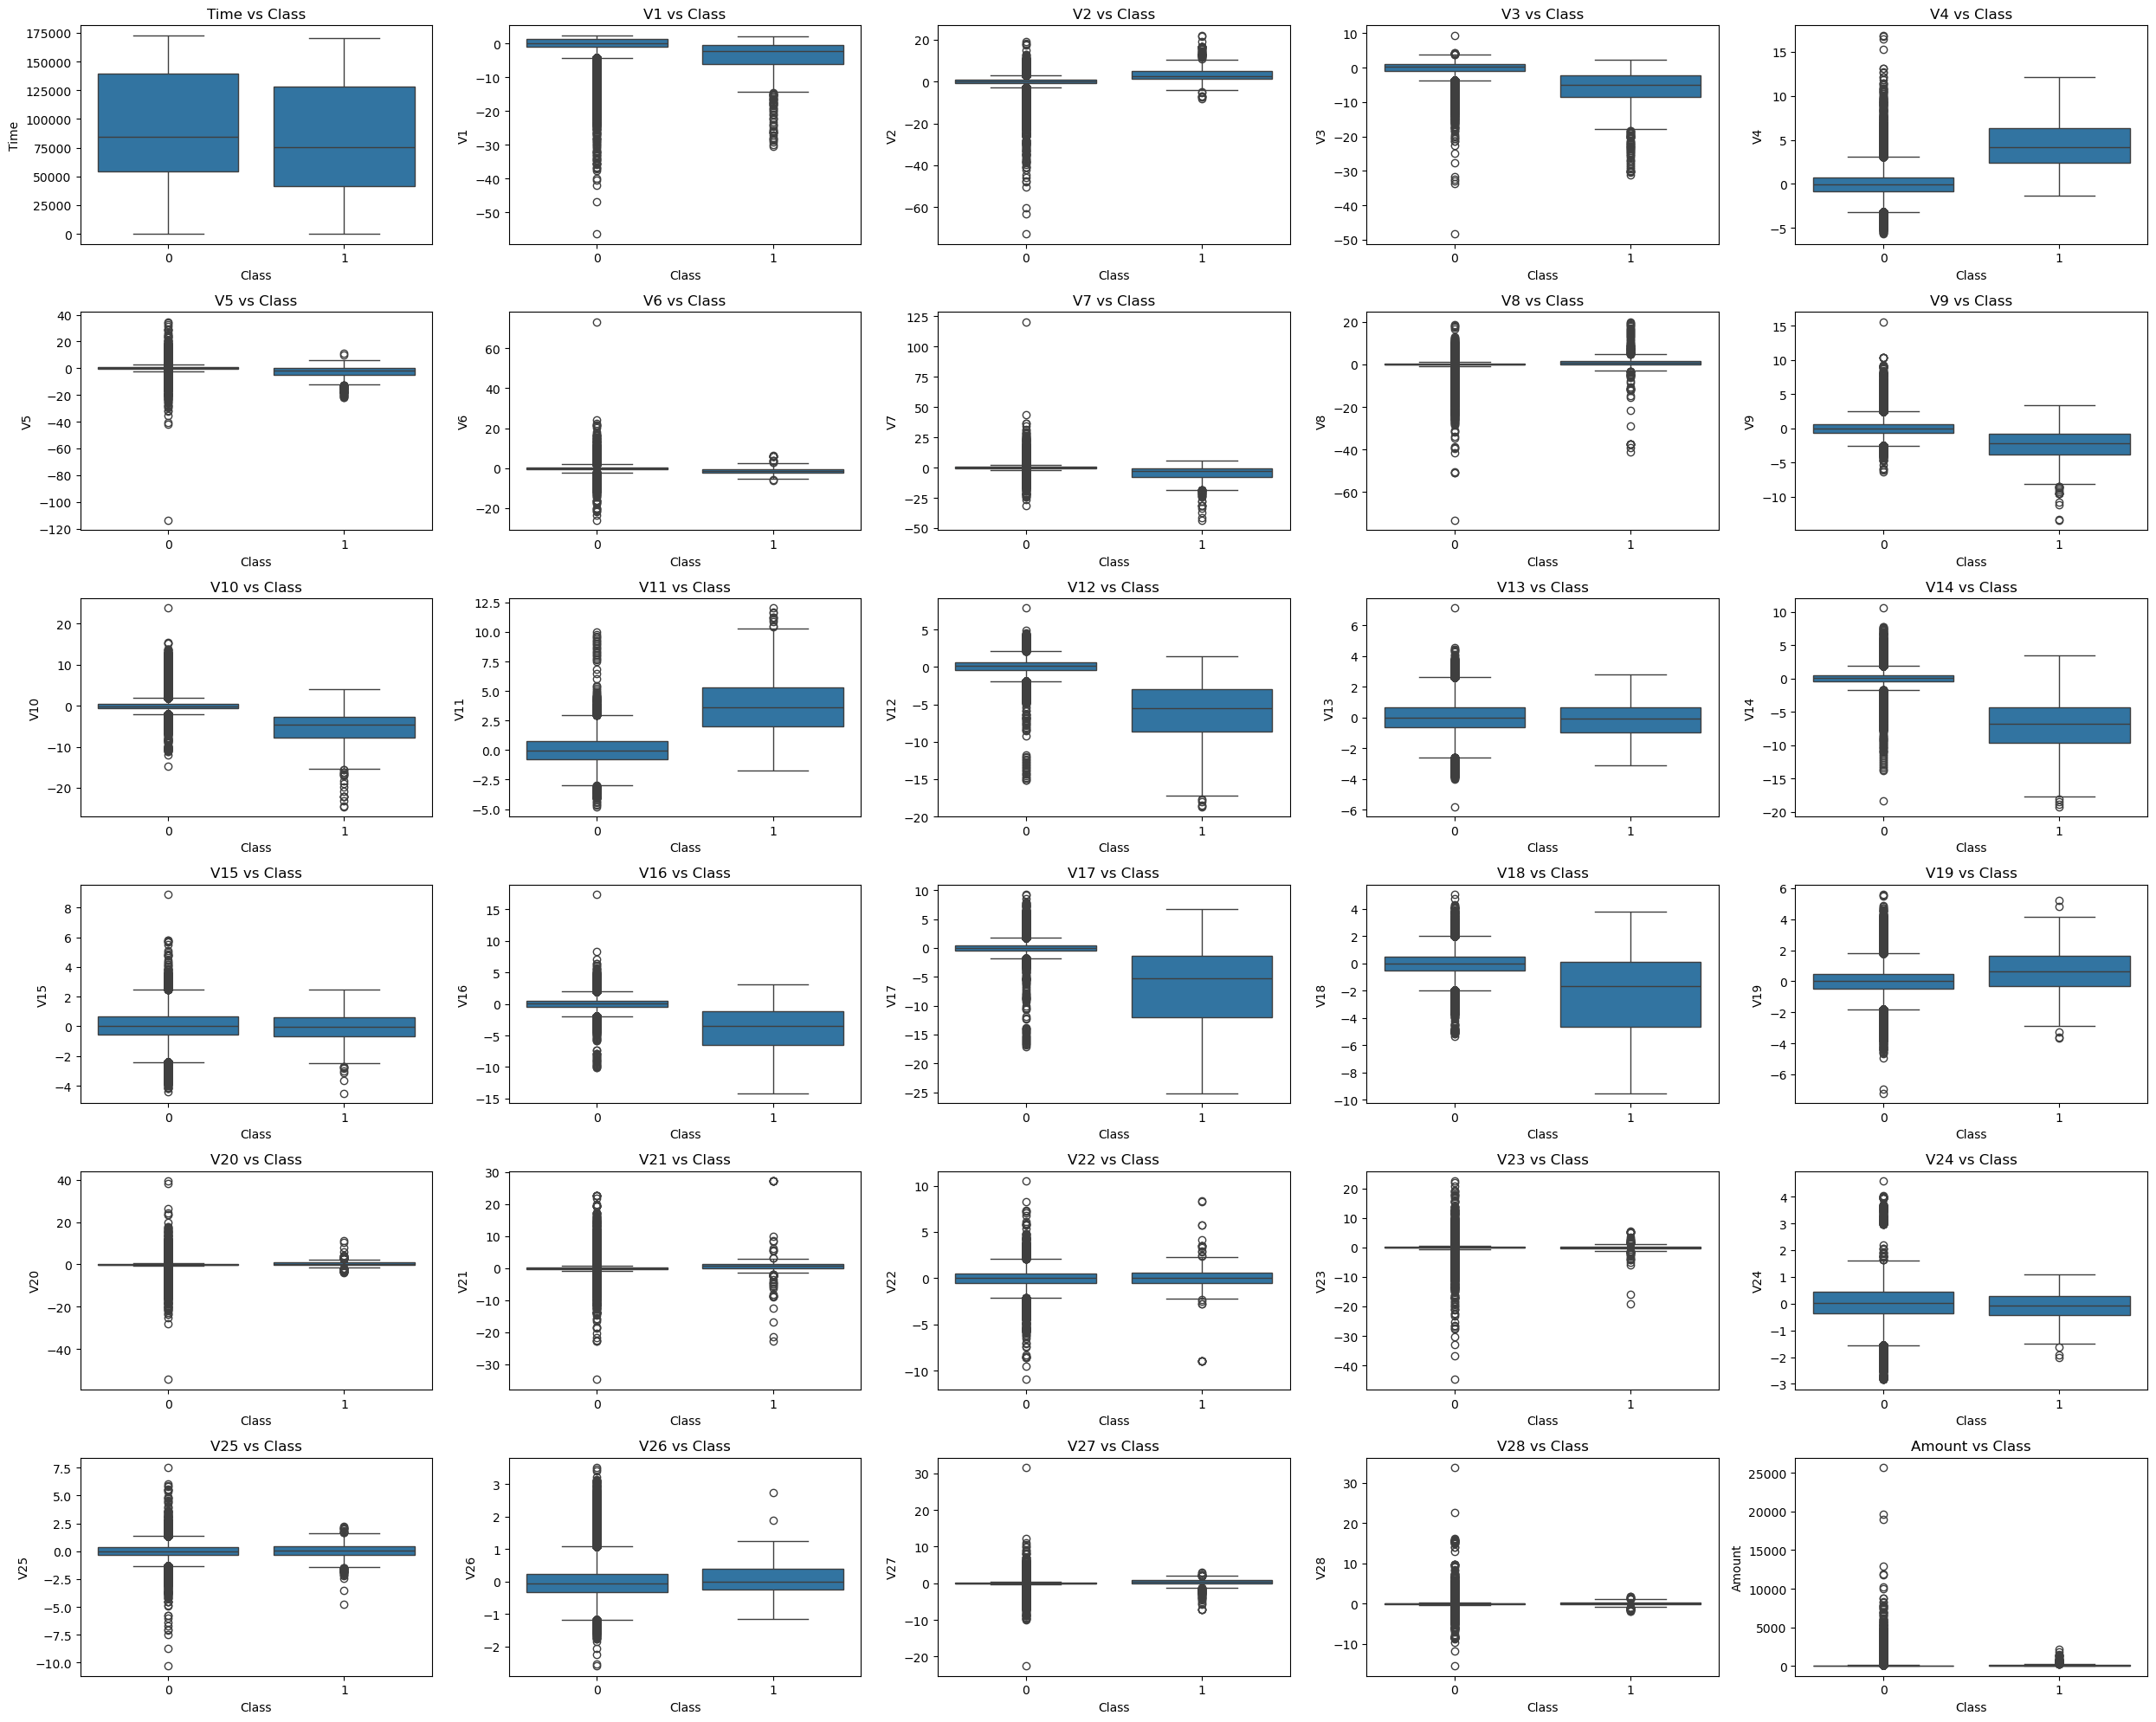

In [23]:
#Plotting box lots to observe outliers
plt.figure(figsize=(25,20))
for i in range(30):
    plt.subplot(6,5,i+1)
    sns.boxplot(data=df, x='Class', y= df.columns[:-1][i])
    plt.title(f'{df.columns[:-1][i]} vs Class',)
plt.tight_layout()

**Analysis of box plots**

As we can see, various features contain extreme outliers. These are values that are notably separated from the rest of the values in the distribution, either because they are too high or too low. A clear example of an extreme outlier can be seen in the box plots for columns V5, V6, and V7. In V5, we have an extremely low outlier, whereas in V6 anv V7, we have extremely high outliers. These values make it harder for the model to generalize because they might represent cases that are too niche or wrongly inputted data. Therefore, they should be removed before training.

Before removing outliers, we will perform feature selection. That way, we will only remove outliers from the selected features.

## Feature selection

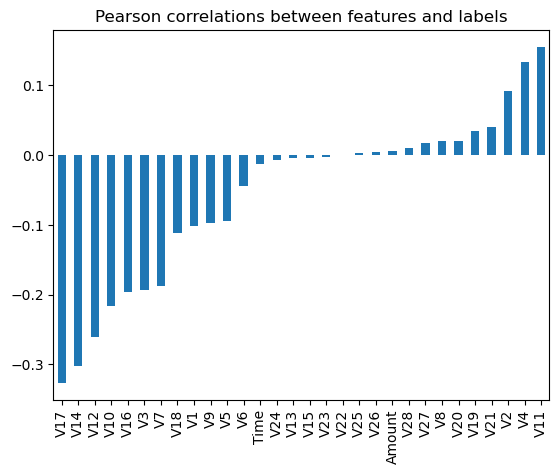

In [24]:
#Plotting the correlation between each feature the class
df.corr(method='pearson')['Class'][:-1].sort_values().plot(kind='bar', 
                                             title= 'Pearson correlations between features and labels');

**Correlation analysis**

As we can see, some features have high correlation with class. This means that, theoretically, they can be useful for predicting the correct labels. Some features have negative correlation while others have positive ones. In either case, if the absolute value is large, the feature is likely a good predictor. The negative correlation only means that if the feature has a high value, then the class value (label) will tend to be lower. Therefore, if a feature with negative correlation has a high number, the transaction will tend to be non-fraudulent. The opposite applies for features with positive correlation.

In [25]:
#The 20 features with the least correlation to class.
df.corr(method='pearson')['Class'].abs().sort_values()[:20]

V22       0.000805
V23       0.002685
V25       0.003308
V15       0.004223
V26       0.004455
V13       0.004570
Amount    0.005632
V24       0.007221
V28       0.009536
Time      0.012323
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V6        0.043643
V2        0.091289
V5        0.094974
V9        0.097733
V1        0.101347
Name: Class, dtype: float64

**Feature removal**

As previously mentioned, features with very low correlations to the label class are likely to be bad predictors and hinder model performance. Therefore we will remove features with a correlation value below a threshold from the dataset. The threshold value in this case will be 0.05. If the absolute correlation value is below, 0.05, the feature will be removed from the dataset. Therefore, the following features will be removed:

V22, V23, V25, V15, V26, V13, Amount, V24, V28, Time, V27, V8, V20, V19, V21, and V6.

In [26]:
#defining a new dataframe without the features removed
df_fs = df.drop(['V22','V23','V25','V15','V26','V13', 'Amount',
                 'V24', 'V28', 'Time', 'V27', 'V8', 'V20', 'V19',
                 'V21', 'V6'], axis=1)

#we now have 15 features that we will use to predict the class
len(df_fs.columns)

15

## Outlier removal

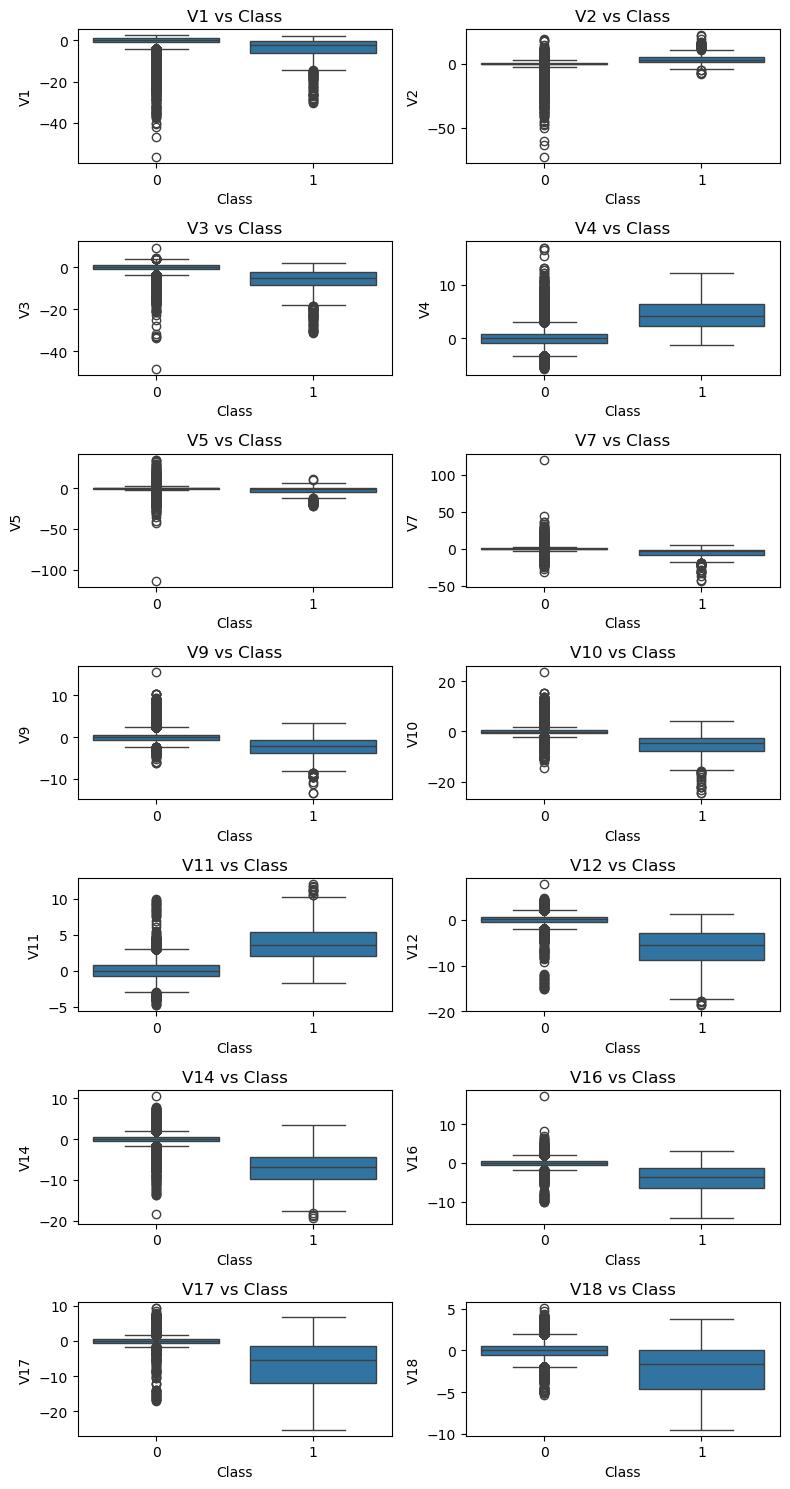

In [27]:
#Plotting again the box plots for the remaining features
plt.figure(figsize=(8,15))
for i in range(14):
    plt.subplot(7,2,i+1)
    sns.boxplot(data=df_fs, x='Class', y= df_fs.columns[:-1][i])
    plt.title(f'{df_fs.columns[:-1][i]} vs Class',)
plt.tight_layout();

**Criteria for outlier removal**

Now that we have chosen the features that will be worked on, we must remove the extreme outliers from the dataset. We will only remove the extreme cases in order to avoid losing information. Because of this, the threshold for removal must be considered carefully.

To determine the extreme outliers, we will use the interquantile range (IQR) method. The IQR is range between the 25 percentile (Q1) and 75 percentile (Q3) points of the data, and we can use it along with Q1 and Q3 to determine outliers by using the following rule: 

* upper outliers are above the point Q3+1.5IQR

* lower outliers are below the point Q1-1.5IQR.

In this case we will use a modified version of this calculation to make sure that we only remove the most extreme cases. Instead of multiplying the IQR by 1.5, we will multiply it by 4. This makes it so that fewer outliers are detected, leaving only the most extreme ones. The choice of the number 4 comes from an iterative process in which multiple numbers were tested and 4 provided the best results. If we used 1.5, we would have to remove more than 70000 instances, which is about 25% of our data.

In [28]:
def detect_extreme_outliers(df: pd.DataFrame) -> list:
    index_array = []

    #iterating through each feature 
    for column in df.columns[:-1]:
        #calculating the bounds
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3-Q1
        lower_bound = Q1-4*IQR
        upper_bound = Q3+4*IQR
        #determining the indexes of the rows to remove that contain extreme outliers
        indexes_to_append = [index for index in df[column][(df[column]<lower_bound) | (df[column]>upper_bound)].index]
        index_array.append(indexes_to_append)

    #Placing the indexes in a list
    index_list = []
    for array in index_array:
        for value in array:
            index_list.append(value)

    #Removing the duplicate indexes
    indexes_to_remove = [value for value in set(index_list)]
    return indexes_to_remove

**Frauds and non-frauds separation**

With this function defined, we can now determine the indexes of the rows that contain extreme outliers in any of the features.

However, we must make one important consideration. As we saw in the box plots, the distributions for the non-fraudulent and fraudulent cases are completely different. This means that we must determine 'fraud' and 'non-fraud' outliers for each feature. If we do it together, we run the risk of removing non-outliers from the 'fraud' distribution, which would result in information loss. This is particularly dangerous in this problem because we have very few fraud cases.

In [29]:
#Set of non_fraudulent cases
no_fraud_set = df_fs[df_fs['Class']==0]
#Set of fraudulent cases
fraud_set = df_fs[df_fs['Class']==1]

In [30]:
print('Number of non-fraud outliers:', len(detect_extreme_outliers(no_fraud_set)))
print('Number of fraud outliers',len(detect_extreme_outliers(fraud_set)))

Number of non-fraud outliers: 5514
Number of fraud outliers 7


In [31]:
#putting the indexes in a single list
indexes_to_remove = []
for value in detect_extreme_outliers(fraud_set):
    indexes_to_remove.append(value)
for value in detect_extreme_outliers(no_fraud_set):
    indexes_to_remove.append(value)
    
#Determining the total number of outliers
len(indexes_to_remove)

5521

In [32]:
#Defining a new DataFrame without the extreme outliers
new_df = df_fs.copy()
#dropping the outliers
new_df = new_df.drop(indexes_to_remove, axis=0).reset_index(drop=True)

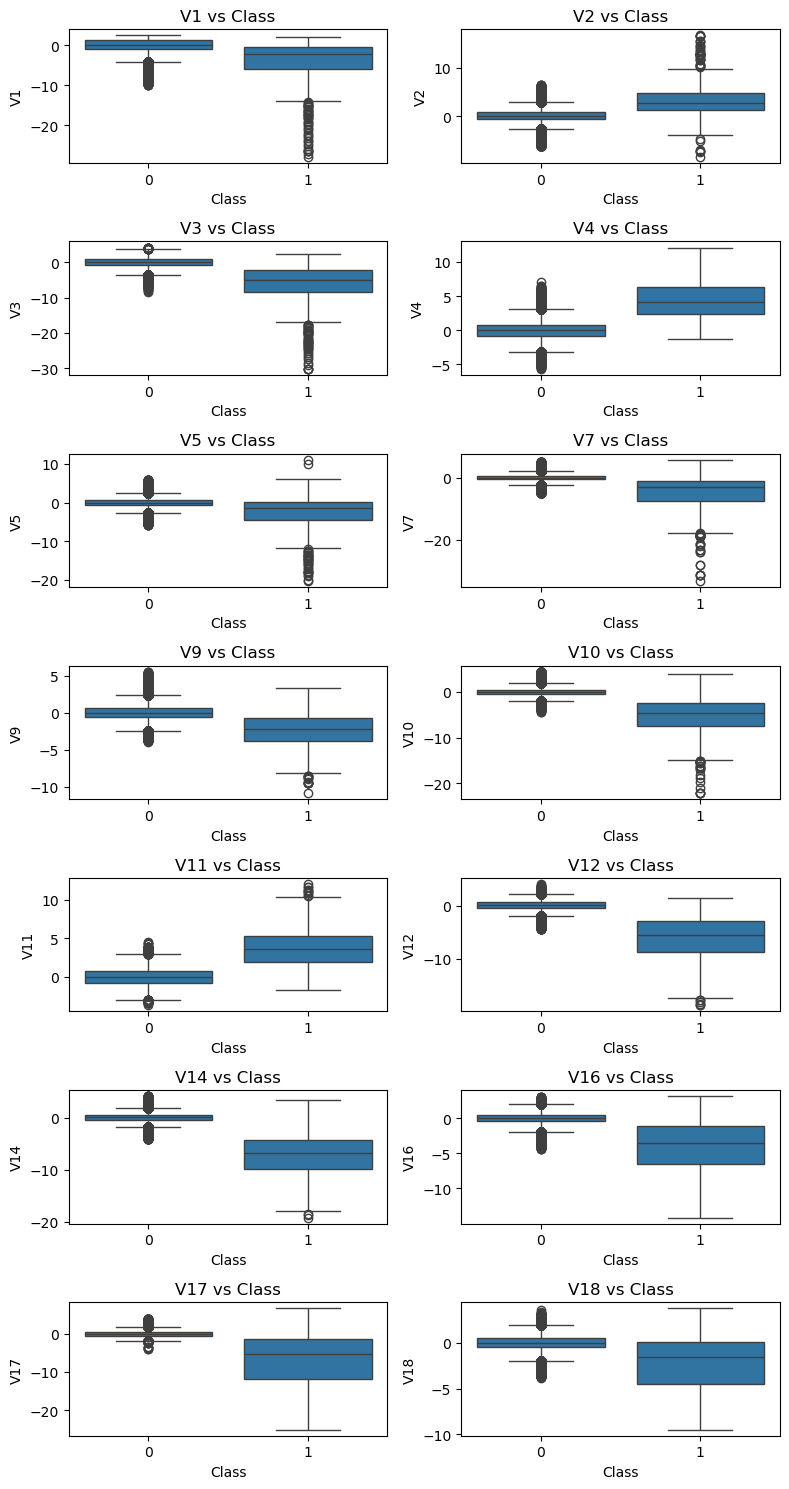

In [33]:
#Plotting again the box plots without extreme outliers
plt.figure(figsize=(8,15))
for i in range(14):
    plt.subplot(7,2,i+1)
    sns.boxplot(data=new_df, x='Class', y= df_fs.columns[:-1][i])
    plt.title(f'{new_df.columns[:-1][i]} vs Class',)
plt.tight_layout();

## Training and test sets

Now that the data has been preprocessed, we can begin the process of creating a model that is able to predict whether a transaction is fraudulent given values for each feature. The first step in this process is to split the dataset into a training and test set. As their names suggest, the training set will be used to train the created model, and the test set will be used to confirm whether the model generalized correctly.

At this point in the process is where we must address the **class imbalance** problem that was mentioned earlier. We will deal with class imbalance through three methods:

* Random undersampling: removing random samples of the majority class until its number equals that of the minority class.

* Random oversampling: repeating random samples of the minority class until its number equals that of the majority class.

* Synthetic minority oversampling technique (SMOTE): creating new samples of the minority class that belong to the same feature space of the original samples.

**Baseline (no imbalance treatment)**

In [34]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random undersampling**

In [35]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

For the oversampling techniques, it was important to create a train and test split before oversampling. This is because if we apply the techniques to the entire set and then split, the test split will have data that is repeated in the training set, leading to data leakage.

**Random oversampler**

In [36]:
#import randomoversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_rov, y_train_rov = ros.fit_resample(X_train, y_train)

**SMOTE**

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Model creation

Finally, we will create model that trains on the data to learn to classify a transaction as fraudulent or non-fraudulent. For this, we will use a LigthGBM model that will train on the four training sets created. We will then observe the **precision, recall, and f1 scores** to determine which class imbalance treatment technique led to the best results.

The reason for observing these three scores is that we are dealing with an imbalanced dataset, which means that accuracy is not a good way to measure model performance. Instead, we need to make sure that the model is good at detecting frauds (recall score) without misclassifying too many non-fraudulant cases (precision score). The f1 score is a measure that combines the recall and the precision scores. A model with 100% recall but bad precision will detect every single fraud instance, but it will also produce so many false positives that it will be impossible to know whether a detected fraud is legitimate or not.

From LightGBM's documentation, we know that LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.

* Lower memory usage.

* Better accuracy.

* Support of parallel, distributed, and GPU learning.

* Capable of handling large-scale data.


In [38]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

**Baseline (no imbalance treatment)**

In [41]:
model_base = LGBMClassifier(verbose=-1)
model_base.fit(X_train, y_train)
print(classification_report(y_test, model_base.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55781
           1       0.85      0.88      0.87        77

    accuracy                           1.00     55858
   macro avg       0.92      0.94      0.93     55858
weighted avg       1.00      1.00      1.00     55858



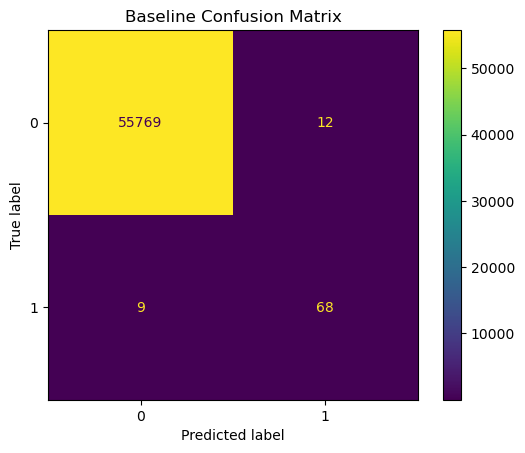

In [40]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model_base.predict(X_test))).plot()
plt.title('Baseline Confusion Matrix');

**Random undersampling**

In [334]:
model_us = LGBMClassifier(verbose=-1)
model_us.fit(X_train_us, y_train_us)

print(classification_report(y_test, model_us.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     55781
           1       0.03      0.92      0.07        77

    accuracy                           0.96     55858
   macro avg       0.52      0.94      0.52     55858
weighted avg       1.00      0.96      0.98     55858



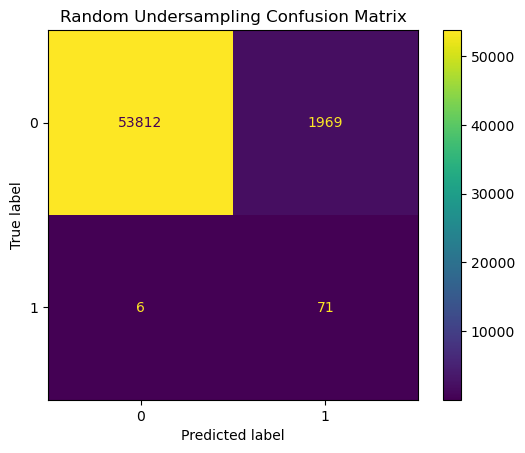

In [335]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model_us.predict(X_test))).plot()
plt.title('Random Undersampling Confusion Matrix');

**Random oversampling**

In [336]:
model_ov = LGBMClassifier(verbose=-1)
model_ov.fit(X_train_rov, y_train_rov)

print(classification_report(y_test, model_ov.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55781
           1       0.93      0.88      0.91        77

    accuracy                           1.00     55858
   macro avg       0.97      0.94      0.95     55858
weighted avg       1.00      1.00      1.00     55858



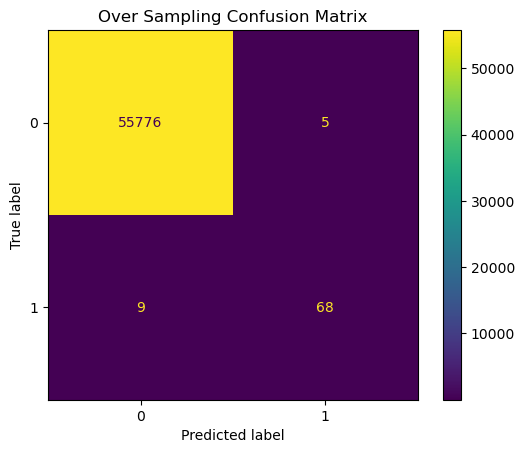

In [337]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model_ov.predict(X_test))).plot()
plt.title('Over Sampling Confusion Matrix');

**SMOTE**

In [338]:
model_sm = LGBMClassifier(verbose=-1)
model_sm.fit(X_train_smote, y_train_smote)

print(classification_report(y_test, model_sm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55781
           1       0.28      0.90      0.42        77

    accuracy                           1.00     55858
   macro avg       0.64      0.95      0.71     55858
weighted avg       1.00      1.00      1.00     55858



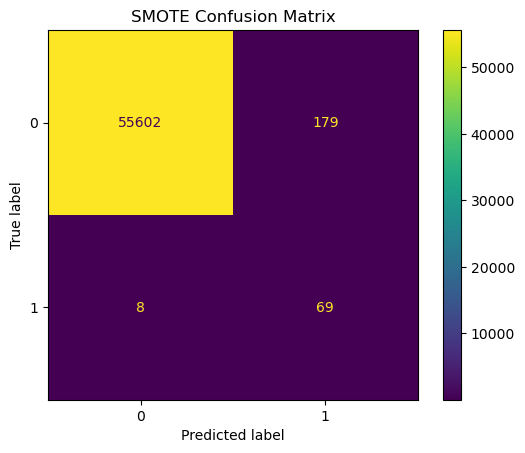

In [339]:
ConfusionMatrixDisplay(confusion_matrix(y_test, model_sm.predict(X_test))).plot()
plt.title('SMOTE Confusion Matrix');

**Anlysis of the data imbalance techniques**

As we can see, out of the three techniques used to handle the imbalance problem, the two that resulted in the best scores were the random oversample and SMOTE techniques. Out of those two, the model trained on the SMOTE dataset obtained a better recall score, correctly classifying 1 more fraud case than the random oversample model. However, the SMOTE model produced a much worse precision (0.28 vs 0.93), which means that, although the recall was better, it will produce many false positive that will make it harder to trust that the detected fraud is actually a frad. This is why, despite having a slightly lower recall, the model trained on the random oversampled set is considered better.

On the other hand. The model with the highest recall was the one trained on the undersampled set. However, it suffers from the same problem of the SMOTE model: it produces too many false positives. This is expected because it simply does not have sufficient examples of non-frauds to learn their patterns and correctly identify them.

## Hyperparameter tuning

Now that we know the best technique for handling unbalanced datasets, we can try to improve the Light GBM model by tuning its hyperparameters.

In this section, we use hyperopt to perform the hyperparameter tuning of the Light GBM model.

In [257]:
from hyperopt import hp, fmin, tpe, Trials, space_eval
from hyperopt.pyll.base import scope
from sklearn.metrics import f1_score

np.random.seed(42)

# Define the hyperparameter search space
space = space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'max_depth': scope.int(hp.quniform('max_depth', -1, 15, 1)),
    'min_child_samples': scope.int(hp.quniform('min_child_samples', 10, 30, 1)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 1500, 100)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 30, 80, 1))
}

# Define the objective function
def objective(params):
    
    # Create the model
    model = LGBMClassifier(**params, verbose=-1)
    
    # Fit the model
    model.fit(X_train_rov, y_train_rov)
    
    # Calculate evaluation metric
    # Here we use the f1 score obtained with test set, which is not ideal because we shouldn't use the test set for tuning
    # However, we will use it as an indicator of the model's performance to avoid  using cross validation, which is computationally expensive
    ev_metric = f1_score(y_test, model.predict(X_test))
    
    return -ev_metric  # Minimize negative f1-score

# Run the hyperparameter optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

100%|██████████| 50/50 [25:12<00:00, 30.24s/trial, best loss: -0.9379310344827586]


In [340]:
# Evaluate the best hyperparameters using space_eval
best_params = space_eval(space, best)

Best hyperparameters:

 {'colsample_bytree': 0.8064682436475378,
 
 'learning_rate': 0.06480184657424211,
 
 'max_depth': 7,
 
 'min_child_samples': 10,
 
 'n_estimators': 800,
 
 'num_leaves': 37,
 
 'subsample': 0.644850584040708}

In [341]:
#Creating a model with the best parameters
model = LGBMClassifier(**best_params, verbose=-1)
model.fit(X_train_rov, y_train_rov)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55781
           1       1.00      0.88      0.94        77

    accuracy                           1.00     55858
   macro avg       1.00      0.94      0.97     55858
weighted avg       1.00      1.00      1.00     55858



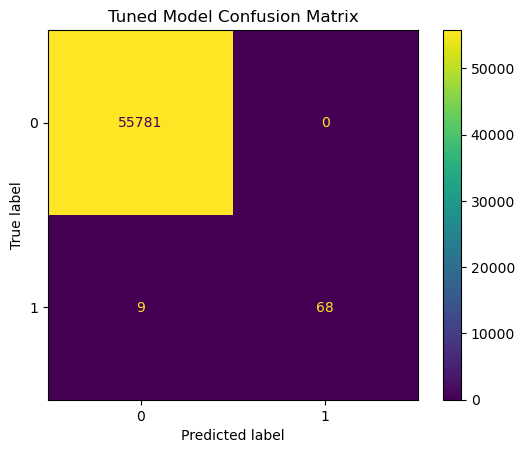

In [344]:
#Confusion matrix for the tuned model
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test))).plot()
plt.title('Tuned Model Confusion Matrix');

Although the tuned model still produced a recall score of 0.88 (meaning that it detected the same number of frauds and false negativs), its precision increased from 0.93 to 1, which is the maximum value possible! This means that the model did not produce a single false positive, thus greatly increasing our confidence in the validity of the frauds detected.

Finally, we will plot the precision-recall curve. This is a plot similar to the ROC curve that we would plot in a typical classification problem. However, this one is better suited for classification problems with great class imbalance. Just like an ROC curve, we want to maximize the area under the curve.

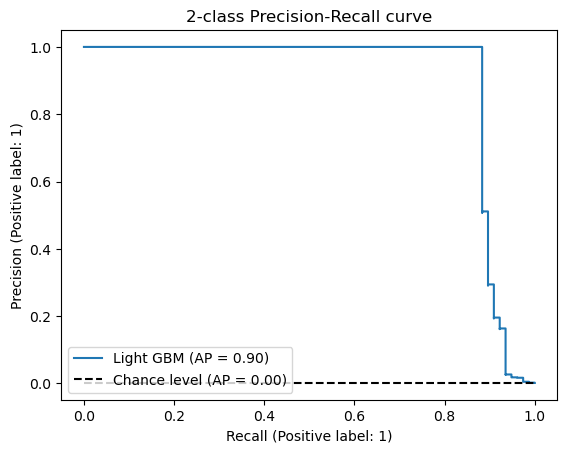

In [343]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="Light GBM", plot_chance_level=True)

display.ax_.set_title("2-class Precision-Recall curve");